# Linear Regression With Neural Networks

## Import

In [1]:
from torch import optim
import torch
#import torch.nn.functional as F
from torch import nn

import matplotlib.pyplot as plt
import pandas as pd

## Load and Prepare Data 

In [2]:
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

df_train.head()

,Unnamed: 0,x,y
0,0,0.771270,2.474538
1,1,0.063558,1.192772
2,2,0.863103,2.912784
3,3,0.025419,1.078507
4,4,0.731994,2.473164


In [3]:
x_train = torch.tensor(df_train['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df_train['y'].values, dtype=torch.float32)

x_test = torch.FloatTensor(df_test['x'].values).unsqueeze(1)
y_test = torch.FloatTensor(df_test['y'].values)

## Visualize Data

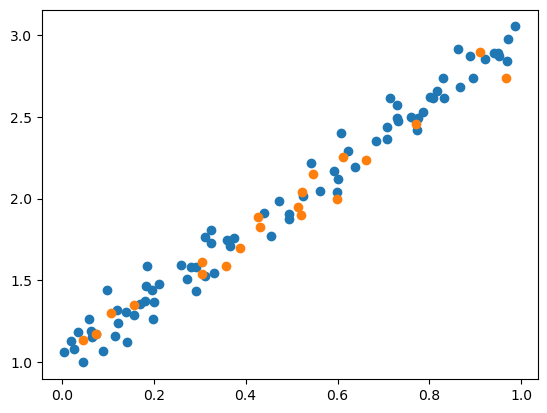

In [4]:
plt.scatter(x_train , y_train)
plt.scatter(x_test , y_test);

## Model

In [5]:
model = nn.Linear(in_features=1 , out_features=1)
parameters = model.parameters()
loss_function = nn.MSELoss()
optimizer = optim.SGD(parameters ,  lr=0.04)

In [6]:
for name, param in model.named_parameters():
  print(name, param)

weight Parameter containing:
tensor([[-0.1660]], requires_grad=True)
bias Parameter containing:
tensor([0.6879], requires_grad=True)


##  Train The Model

In [7]:
N = 500
loss_hist = []

for i in range(N):
    y_hat = model(x_train)
    loss = loss_function(y_hat.squeeze() , y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist.append(loss.item())
    if(i%100 == 0):
        print(f"epoch: {i}  error: {loss.item()}")
    else:
        pass
    

epoch: 0  error: 2.242628574371338
epoch: 100  error: 0.0767446830868721
epoch: 200  error: 0.028485173359513283
epoch: 300  error: 0.014126414433121681
epoch: 400  error: 0.009854177944362164


## Visualizing Regression Line and Training Loss

In [8]:
x_visualize = torch.linspace(x_train.min() , x_train.max() , 200).unsqueeze(1)
y_visualize = model(x_visualize)

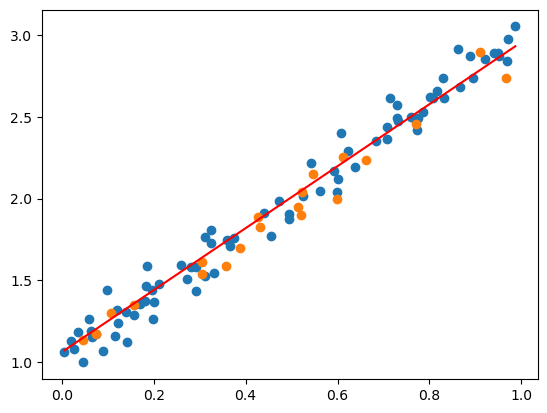

In [9]:
plt.scatter(x_train , y_train)
plt.plot(x_visualize.detach() , y_visualize.detach() , c='r')
plt.scatter(x_test , y_test);

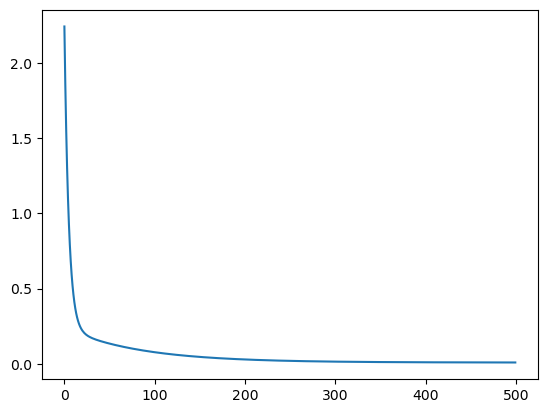

In [10]:
plt.plot(range(N) , loss_hist)

## Testing Model  

In [11]:
from torchmetrics import R2Score
y_hat_test = model(x_test)
r2 = R2Score()
r2_score = r2(y_hat_test.squeeze(), y_test)
Mae = nn.L1Loss()
Mae = Mae(y_hat_test.squeeze() , y_test)
print(f"R2 score on test set: {r2_score.item():.4f}")
print(f"Mae on test set: {Mae.item():.4f}")

R2 score on test set: 0.9627
Mae on test set: 0.0737
